/opt/anaconda3/envs/research/lib/python3.11/site-packages/gstools/transform/array.py:136: UserWarning: Box-Cox: Some values will be cut off!
  warn("Box-Cox: Some values will be cut off!")


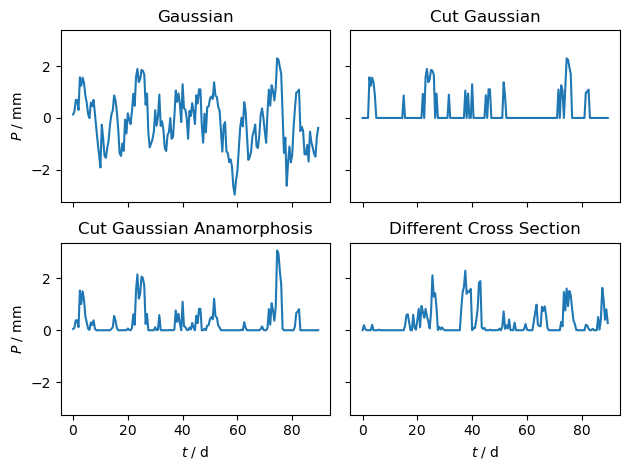

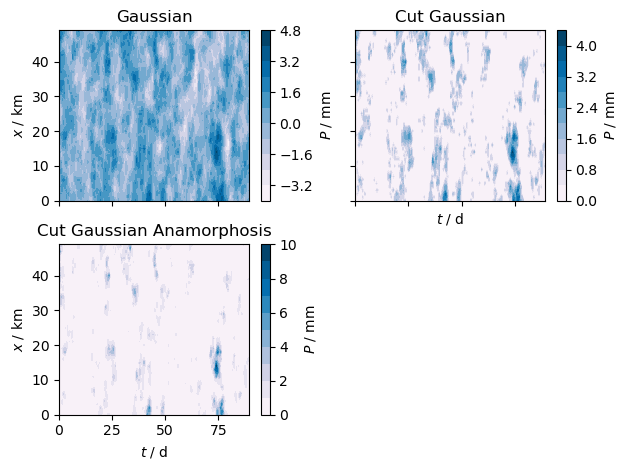

In [1]:
"""
Creating a 1D Synthetic Precipitation Field
-------------------------------------------

In this example we will create a time series of a 1D synthetic precipitation
field.

We'll start off by creating a Gaussian random field with an exponential
variogram, which seems to reproduce the spatial correlations of precipitation
fields quite well. We'll create a daily timeseries over a one dimensional cross
section of 50km. This workflow is suited for sub daily precipitation time
series.
"""

import copy

import matplotlib.pyplot as plt
import numpy as np

import gstools as gs

# fix the seed for reproducibility
seed = 20170521
# spatial axis of 50km with a resolution of 1km
x = np.arange(0, 50, 1.0)
# half daily timesteps over three months
t = np.arange(0.0, 90.0, 0.5)

# space-time anisotropy ratio given in units d / km
st_anis = 0.4

# an exponential variogram with a corr. lengths of 2d and 5km
model = gs.Exponential(
    temporal=True, spatial_dim=1, var=1, len_scale=5, anis=st_anis
)
# create a spatial random field instance
srf = gs.SRF(model, seed=seed)

pos, time = [x], [t]

# a Gaussian random field which is also saved internally for the transformations
srf.structured(pos + time)
P_gau = copy.deepcopy(srf.field)

###############################################################################
# Next, we could take care of the dry periods. Therefore we would simply
# introduce a lower threshold value. But we will combine this step with the
# next one. Anyway, for demonstration purposes, we will also do it with the
# threshold value now.

threshold = 0.85
P_cut = copy.deepcopy(srf.field)
P_cut[P_cut <= threshold] = 0.0

###############################################################################
# With the above lines of code we have created a cut off Gaussian spatial
# random field with an exponential variogram. But precipitation fields are not
# distributed Gaussian. Thus, we will now transform the field with an inverse
# box-cox transformation (create a non-Gaussian field) , which is often used to
# account for the skewness of precipitation fields. Different values have been
# suggested for the transformation parameter lambda, but we will stick to 1/2.
# As already mentioned, we will perform the cutoff for the dry periods with
# this transformation implicitly with the shift. The warning will tell you
# that values have indeed been cut off and it can be ignored. We call the
# resulting field Gaussian anamorphosis.

# the lower this value, the more will be cut off, a value of 0.2 cuts off
# nearly everything in this example.
cutoff = 0.55
gs.transform.boxcox(srf, lmbda=0.5, shift=-1.0 / cutoff)

###############################################################################
# As a last step, the amount of precipitation is set. This should of course be
# calibrated towards observations (the same goes for the threshold, the
# variance, correlation length, and so on).

amount = 2.0
srf.field *= amount
P_ana = srf.field

###############################################################################
# Finally we can have a look at the fields resulting from each step. Note, that
# the cutoff of the cut Gaussian only approximates the cutoff values from the
# box-cox transformation. For a closer look, we will examine a cross section
# at an arbitrary location. And afterwards we will create a contour plot for
# visual candy.

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True)

axs[0, 0].set_title("Gaussian")
axs[0, 0].plot(t, P_gau[20, :])
axs[0, 0].set_ylabel(r"$P$ / mm")

axs[0, 1].set_title("Cut Gaussian")
axs[0, 1].plot(t, P_cut[20, :])

axs[1, 0].set_title("Cut Gaussian Anamorphosis")
axs[1, 0].plot(t, P_ana[20, :])
axs[1, 0].set_xlabel(r"$t$ / d")
axs[1, 0].set_ylabel(r"$P$ / mm")

axs[1, 1].set_title("Different Cross Section")
axs[1, 1].plot(t, P_ana[10, :])
axs[1, 1].set_xlabel(r"$t$ / d")

plt.tight_layout()

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True)

axs[0, 0].set_title("Gaussian")
cont = axs[0, 0].contourf(t, x, P_gau, cmap="PuBu", levels=10)
cbar = fig.colorbar(cont, ax=axs[0, 0])
cbar.ax.set_ylabel(r"$P$ / mm")
axs[0, 0].set_ylabel(r"$x$ / km")

axs[0, 1].set_title("Cut Gaussian")
cont = axs[0, 1].contourf(t, x, P_cut, cmap="PuBu", levels=10)
cbar = fig.colorbar(cont, ax=axs[0, 1])
cbar.ax.set_ylabel(r"$P$ / mm")
axs[0, 1].set_xlabel(r"$t$ / d")

axs[1, 0].set_title("Cut Gaussian Anamorphosis")
cont = axs[1, 0].contourf(t, x, P_ana, cmap="PuBu", levels=10)
cbar = fig.colorbar(cont, ax=axs[1, 0])
cbar.ax.set_ylabel(r"$P$ / mm")
axs[1, 0].set_xlabel(r"$t$ / d")
axs[1, 0].set_ylabel(r"$x$ / km")

fig.delaxes(axs[1, 1])
plt.tight_layout()


/opt/anaconda3/envs/research/lib/python3.11/site-packages/gstools/transform/array.py:136: UserWarning: Box-Cox: Some values will be cut off!
  warn("Box-Cox: Some values will be cut off!")


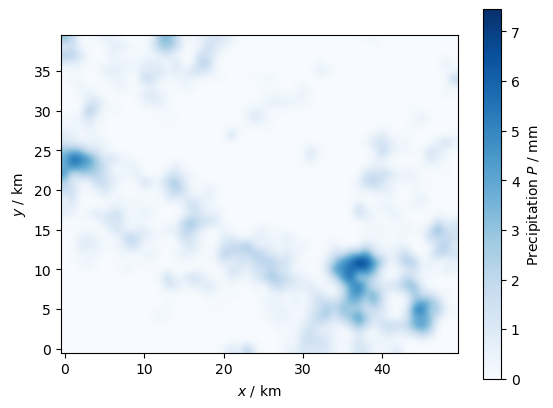

In [2]:
"""
Creating a 2D Synthetic Precipitation Field
-------------------------------------------

In this example we'll create a time series of a 2D synthetic precipitation
field.

Very similar to the previous tutorial, we'll start off by creating a Gaussian
random field with an exponential variogram, which seems to reproduce the
spatial correlations of precipitation fields quite well. We'll create a daily
timeseries over a two dimensional domain of 50km x 40km. This workflow is
suited for sub daily precipitation time series.
"""

import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np

import gstools as gs

# fix the seed for reproducibility
seed = 20170521
# 1st spatial axis of 50km with a resolution of 1km
x = np.arange(0, 50, 1.0)
# 2nd spatial axis of 40km with a resolution of 1km
y = np.arange(0, 40, 1.0)
# half daily timesteps over three months
t = np.arange(0.0, 90.0, 0.5)

# space-time anisotropy ratio given in units d / km
st_anis = 0.4

# an exponential variogram with a corr. lengths of 5km, 5km, and 2d
model = gs.Exponential(
    temporal=True, spatial_dim=2, var=1, len_scale=5, anis=st_anis
)
# create a spatial random field instance
srf = gs.SRF(model, seed=seed)

pos, time = [x, y], [t]

# the Gaussian random field
srf.structured(pos + time)

# account for the skewness and the dry periods
cutoff = 0.55
gs.transform.boxcox(srf, lmbda=0.5, shift=-1.0 / cutoff)

# adjust the amount of precipitation
amount = 4.0
srf.field *= amount

###############################################################################
# plot the 2d precipitation field over time as an animation.


def _update_ani(time_step):
    im.set_array(srf.field[:, :, time_step].T)
    return (im,)


fig, ax = plt.subplots()
im = ax.imshow(
    srf.field[:, :, 0].T,
    cmap="Blues",
    interpolation="bicubic",
    origin="lower",
)
cbar = fig.colorbar(im)
cbar.ax.set_ylabel(r"Precipitation $P$ / mm")
ax.set_xlabel(r"$x$ / km")
ax.set_ylabel(r"$y$ / km")

ani = animation.FuncAnimation(
    fig, _update_ani, len(t), interval=100, blit=True
)


/opt/anaconda3/envs/research/lib/python3.11/site-packages/gstools/field/plot.py:310: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Axes: title={'center': 'Field 3D structured (50, 50, 50)'}, xlabel='lon', ylabel='lat'>

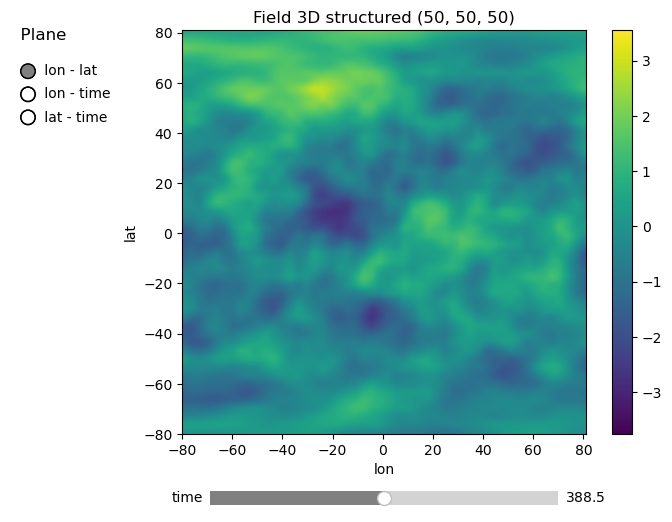

In [3]:
"""
Working with spatio-temporal lat-lon fields
-------------------------------------------

In this example, we demonstrate how to generate a spatio-temporal
random field on geographical coordinates.

First we setup a model, with ``latlon=True`` and ``temporal=True``,
to get the associated spatio-temporal Yadrenko model.

In addition, we will use a kilometer scale provided by :any:`KM_SCALE`
as ``geo_scale`` to have a meaningful length scale in km.
By default the length scale would be given in radians (:any:`RADIAN_SCALE`).
A third option is a length scale in degrees (:any:`DEGREE_SCALE`).

To generate the field, we simply pass ``(lat, lon, time)`` as the position tuple
to the :any:`SRF` class.

We will set a spatial length-scale of `1000` and a time length-scale of `100` days.
"""
import numpy as np

import gstools as gs

model = gs.Matern(
    latlon=True,
    temporal=True,
    var=1,
    len_scale=[1000, 100],
    geo_scale=gs.KM_SCALE,
)

lat = lon = np.linspace(-80, 81, 50)
time = np.linspace(0, 777, 50)
srf = gs.SRF(model, seed=1234)
field = srf.structured((lat, lon, time))
srf.plot()
